# Analysing The Hotel Reservations Data using Data Visuvalisation Techniques

The main focuse of this project is to analyse the Hotel Reservations Dataset to understand customer booking behavior and factors influencing the boooking cancellations. Multiple types of graphs has been plotted to gain the insigts so that useful recommendations can be given. It includes several independant columns and one target column with classes -
  * Not_Canceled ✅
  * Canceled ❌

Dataset Link : https://www.kaggle.com/datasets/ahsan81/hotel-reservations-classification-dataset?select=Hotel+Reservations.csv




**Following columns are present in the dataset :**

1. Booking_ID: Unique identifier for each booking.
2. no_of_adults: Number of adults in the booking.
3. no_of_children: Number of children in the booking.
4. no_of_weekend_nights: Number of weekend nights booked
5. no_of_week_nights: Number of weekday nights booked
6. type_of_meal_plan: Type of meal plan chosen.
7. required_car_parking_space: Indicates if car parking is needed
8. room_type_reserved: Type of room reserved
9. lead_time: Days between booking date and arrival.
10. arrival_year: Year of arrival.
11. arrival_month: Month of arrival.
12. arrival_date: Day of the month of arrival.
13. market_segment_type: Designated market segment category.
14. repeated_guest: Shows if the guest is a repeat visitor
15. no_of_previous_cancellations: Number of previous canceled bookings.
16. no_of_previous_bookings_not_canceled: Number of previous successful bookings.
17. avg_price_per_room: Average daily room price
18. no_of_special_requests: Number of special requests by the guest.
19. booking_status: Indicates if the booking was canceled or not.

# Libraries

In [33]:
# Importing all the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

* All the important libraries essencial for the data analysis task are imported here.

# Dataset Loading and Statistical Analysis

In [34]:
# Reading the dataset collected from the kaggle
hotel_reservations_data = pd.read_csv("/content/Hotel Reservations.csv")

In [35]:
# Examining initial few records from the "Hotel Reservations Dataset"
pd.options.display.max_columns = None
hotel_reservations_data.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [36]:
# Checking dataset dimension
hotel_reservations_data.shape

(36275, 19)

* There are total 36275 records and 19 columns present in the hotel dataset.

In [37]:
# checking how nany null values are present in the dataset
hotel_reservations_data.isna().sum()

,0
Booking_ID,0
no_of_adults,0
no_of_children,0
no_of_weekend_nights,0
no_of_week_nights,0
type_of_meal_plan,0
required_car_parking_space,0
room_type_reserved,0
lead_time,0
arrival_year,0


* The isna().sum() function confirmed that there are no null values present in any column.
* So no need to impute the values with mean, median or mode.

In [38]:
# Checking if there are any duplicate records present
hotel_reservations_data.duplicated().sum()

0

* All records are unique, no duplicate rows present in the dataset.
* So no data redundancy problem.

In [39]:
# Printing the dataset basic information
hotel_reservations_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

* Columns of a different data types are present which includes - object, integer and float.

In [40]:
# Examining the data description
hotel_reservations_data.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_adults,36275.0,1.844962,0.518715,0.0,2.0,2.00,2.0,4.0
no_of_children,36275.0,0.105279,0.402648,0.0,0.0,0.00,0.0,10.0
no_of_weekend_nights,36275.0,0.810724,0.870644,0.0,0.0,1.00,2.0,7.0
no_of_week_nights,36275.0,2.204300,1.410905,0.0,1.0,2.00,3.0,17.0
required_car_parking_space,36275.0,0.030986,0.173281,0.0,0.0,0.00,0.0,1.0
lead_time,36275.0,85.232557,85.930817,0.0,17.0,57.00,126.0,443.0
arrival_year,36275.0,2017.820427,0.383836,2017.0,2018.0,2018.00,2018.0,2018.0
arrival_month,36275.0,7.423653,3.069894,1.0,5.0,8.00,10.0,12.0
arrival_date,36275.0,15.596995,8.740447,1.0,8.0,16.00,23.0,31.0
repeated_guest,36275.0,0.025637,0.158053,0.0,0.0,0.00,0.0,1.0


**Descriptive statistics :**

1. no_of_adults :
* 1.84 adults on average per reservation.
* Reservations can have from 0 to 4 adults with most reservations likely having 1 or 2 adults.

2. no_of_children :
* 0.11 on average indicates that most reservations do not include children.

3. required_car_parking_space :
* On average 0.03 reservations require car parking which indicates low demand for parking spaces.

4. repeated_guest :
* Very few reservations i.e. 0.03 on average come from repeat guests. Most guests are new to the hotel.

5. Guests generally have very few previous cancellations  and a low  prior bookings not canceled which represents familiarity with the booking process. The average room price is approximately 103.42 which reflects mid-range pricing.






In [41]:
# Examining the total count of unique values present in each column
hotel_reservations_data.nunique()

,0
Booking_ID,36275
no_of_adults,5
no_of_children,6
no_of_weekend_nights,8
no_of_week_nights,18
type_of_meal_plan,4
required_car_parking_space,2
room_type_reserved,7
lead_time,352
arrival_year,2


* Here it can be seen that multiple unique values are present in the categorical columns.
* In order to gain deeper insights graphs can be plotted using python data visuvalisation libraries.

In [42]:
# Dropping unwanted column - "Booking_ID"
hotel_reservations_data = hotel_reservations_data.drop(columns=['Booking_ID'])

* The "Booking_ID" column has been dropped from the dataset because it is not providing any useful information for analysis.

In [43]:
hotel_reservations_data.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [44]:
# Define categorical columns
cat_cols = ['type_of_meal_plan', 'room_type_reserved', 'market_segment_type']

# Get unique values for each categorical column
for col in cat_cols:
    print(f"Unique values in '{col}' are as follows:")
    print(hotel_reservations_data[col].unique())
    print()  # Print a newline for better readability

Unique values in 'type_of_meal_plan' are as follows:
['Meal Plan 1' 'Not Selected' 'Meal Plan 2' 'Meal Plan 3']

Unique values in 'room_type_reserved' are as follows:
['Room_Type 1' 'Room_Type 4' 'Room_Type 2' 'Room_Type 6' 'Room_Type 5'
 'Room_Type 7' 'Room_Type 3']

Unique values in 'market_segment_type' are as follows:
['Offline' 'Online' 'Corporate' 'Aviation' 'Complementary']



# Outlier Analysis

In [45]:
# Calculating a Z-scores and creating dataframe to store them
z_scores = stats.zscore(hotel_reservations_data.select_dtypes(include='number'))
z_scores_hotel_reservations_data = pd.DataFrame(z_scores, columns=hotel_reservations_data.select_dtypes(include='number').columns)

# Counting outliers present in the column based on Z-scores
outlier_counts_z = (z_scores_hotel_reservations_data > 3) | (z_scores_hotel_reservations_data < -3)
outlier_counts_z = outlier_counts_z.sum()

# Displaying counts of outliers
for col, count in outlier_counts_z.items():
    print(f"Outliers in {col} column are : {count}")

Outliers in no_of_adults column are : 155
Outliers in no_of_children column are : 1080
Outliers in no_of_weekend_nights column are : 184
Outliers in no_of_week_nights column are : 324
Outliers in required_car_parking_space column are : 1124
Outliers in lead_time column are : 376
Outliers in arrival_year column are : 0
Outliers in arrival_month column are : 0
Outliers in arrival_date column are : 0
Outliers in repeated_guest column are : 930
Outliers in no_of_previous_cancellations column are : 140
Outliers in no_of_previous_bookings_not_canceled column are : 267
Outliers in avg_price_per_room column are : 357
Outliers in no_of_special_requests column are : 761


* Several outliers are present in the dataset.
* Those can be valid in this case so can be kept as it is.

# Data Visuvalisation

## Line Chart

In [46]:
# Defining a function for data analysis
def analyse_bookings_by_arrival_month_year(data, target_col):
    """
    This defined function create line plot to analyse the 'arrival_month' and 'arrival_year' columns with respect to a target variable - "booking_status"

    Parameters:
    data : dataframe containing the data
    target_col : target variable column name
    """
    # Setting aesthetic style of the plots
    sns.set(style="whitegrid")

    # Creating new column for combined year and month for the x-axis
    data['arrival_month_year'] = data['arrival_year'].astype(str) + '-' + data['arrival_month'].astype(str).str.zfill(2)

    # Grouping data by arrival_month_year and booking_status and count the number of bookings
    monthly_counts = data.groupby(['arrival_month_year', target_col]).size().reset_index(name='count')

    # Creating line chart
    plt.figure(figsize=(20, 10))
    sns.lineplot(data=monthly_counts, x='arrival_month_year', y='count', hue=target_col, marker='o', palette=['#664E88', '#B3E2A7'])
    plt.title('Line Chart - Bookings by Arrival Month-Year and Booking Status')
    plt.xlabel('Arrival Month-Year')
    plt.ylabel('Count of Bookings')
    plt.xticks(rotation=90)
    plt.legend(title=target_col)
    plt.tight_layout()
    plt.show()

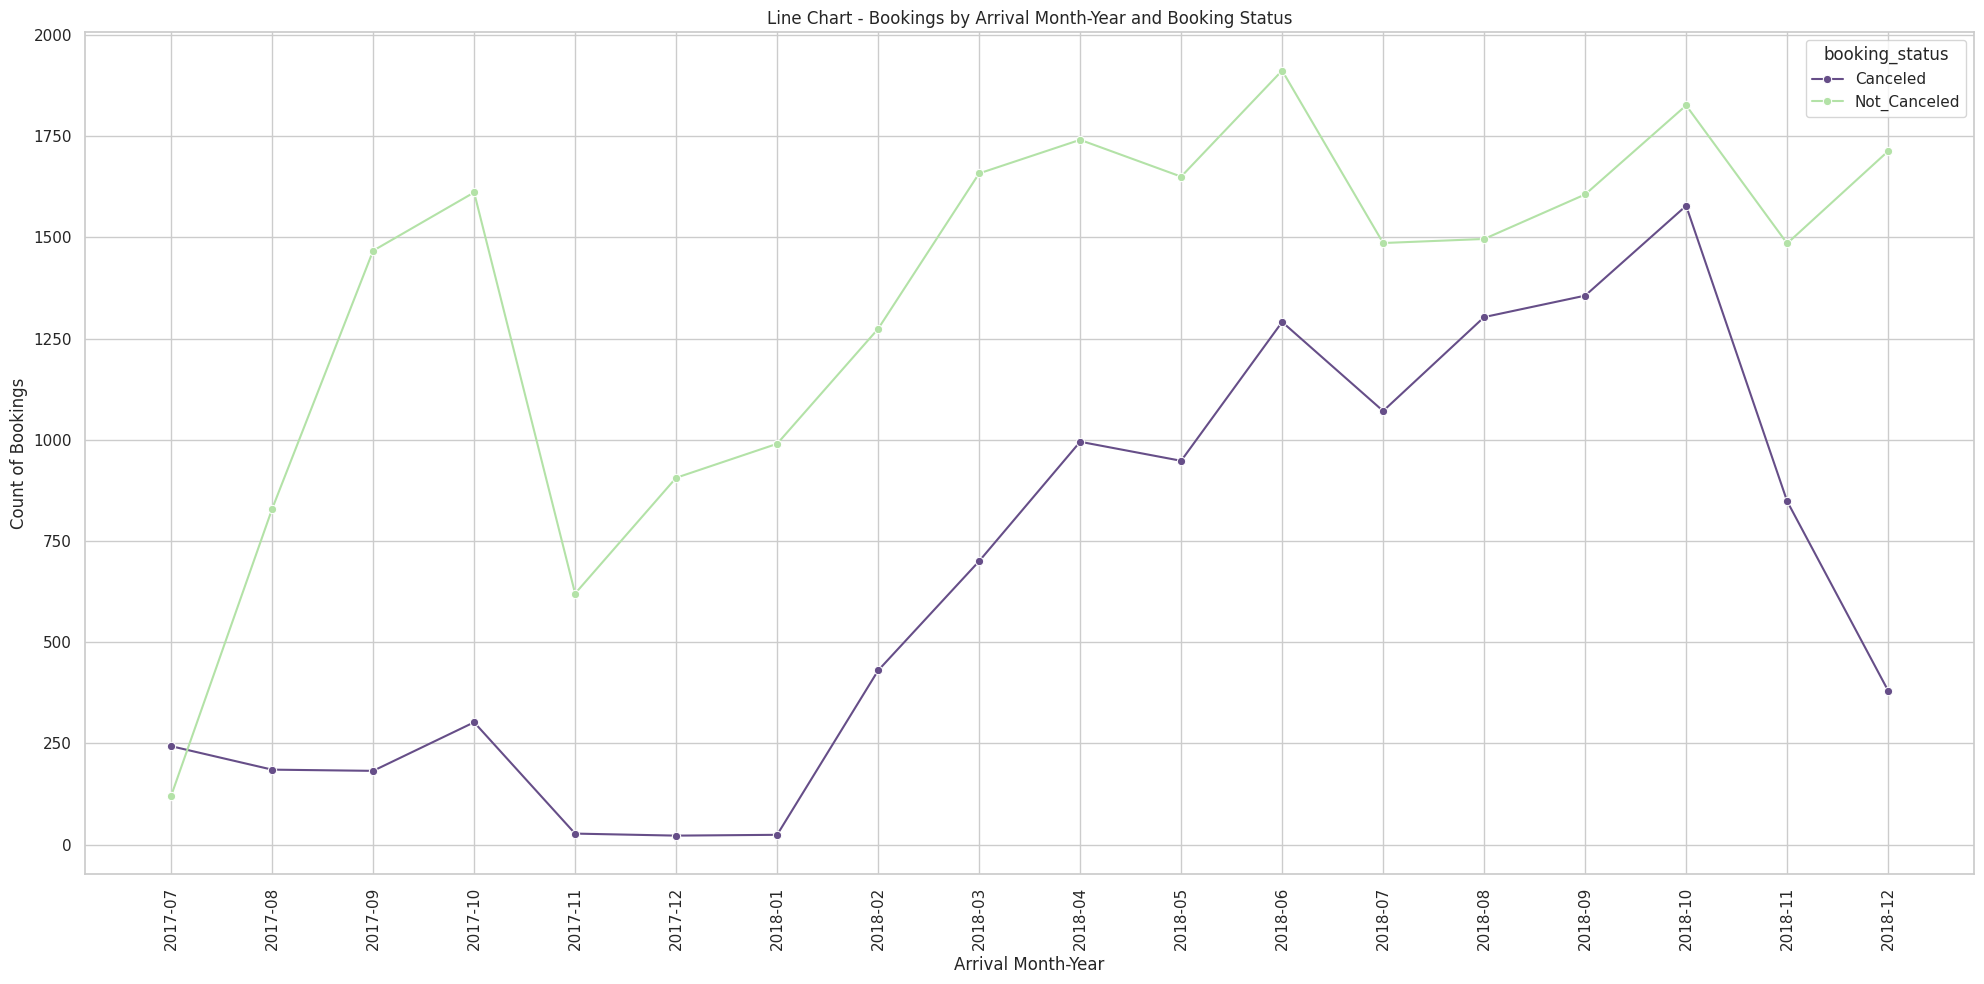

In [47]:
# calling a defined function to plot a line chart in order to analyse bookings by arrival month and year
analyse_bookings_by_arrival_month_year(hotel_reservations_data, 'booking_status')

**The above line chart indicates the following things :**

1. There is a noticeable seasonal pattern with cancellations generally peaking around October in both 2017 and 2018. This suggests that guests may be more likely to cancel bookings in the fall.

2. Non-canceled bookings consistently remain higher than canceled bookings across all months. This indicates that most guests follow through with their reservations.

3. Both canceled and non-canceled bookings show a substantial decline starting from October 2018 particularly for cancellations in November and December. This could be due to seasonal changes, economic factors or a drop in demand.


## Clustered Bar Chart

In [48]:
# Defining a function for data analysis
def analyze_room_type_reserved(data, target_col):
    """
    This function creates vertical clustered bar plot to analyze the 'room_type_reserved' column with respect to a target variable
    Parameters:
    data : dataframe containing the data.
    target_col : Target column name
    """
    sns.set(style="whitegrid")

    # Creating vertical clustered bar plot
    plt.figure(figsize=(20, 10))
    count_plot = sns.countplot(data=data, x='room_type_reserved', hue=target_col, palette=['#664E88', '#B3E2A7'])
    plt.title('Clustered Bar Chart - Room Type Reserved with Respect to Booking Status')
    plt.xlabel('Room Type Reserved')
    plt.ylabel('Count')
    plt.legend(title=target_col)

    # Annotating counts on each bar
    for p in count_plot.patches:
        count = int(p.get_height())
        count_plot.annotate(count, (p.get_x() + p.get_width() / 2, p.get_height()),
                            ha='center', va='bottom', color='black', fontsize=10)
    plt.tight_layout()
    plt.show()

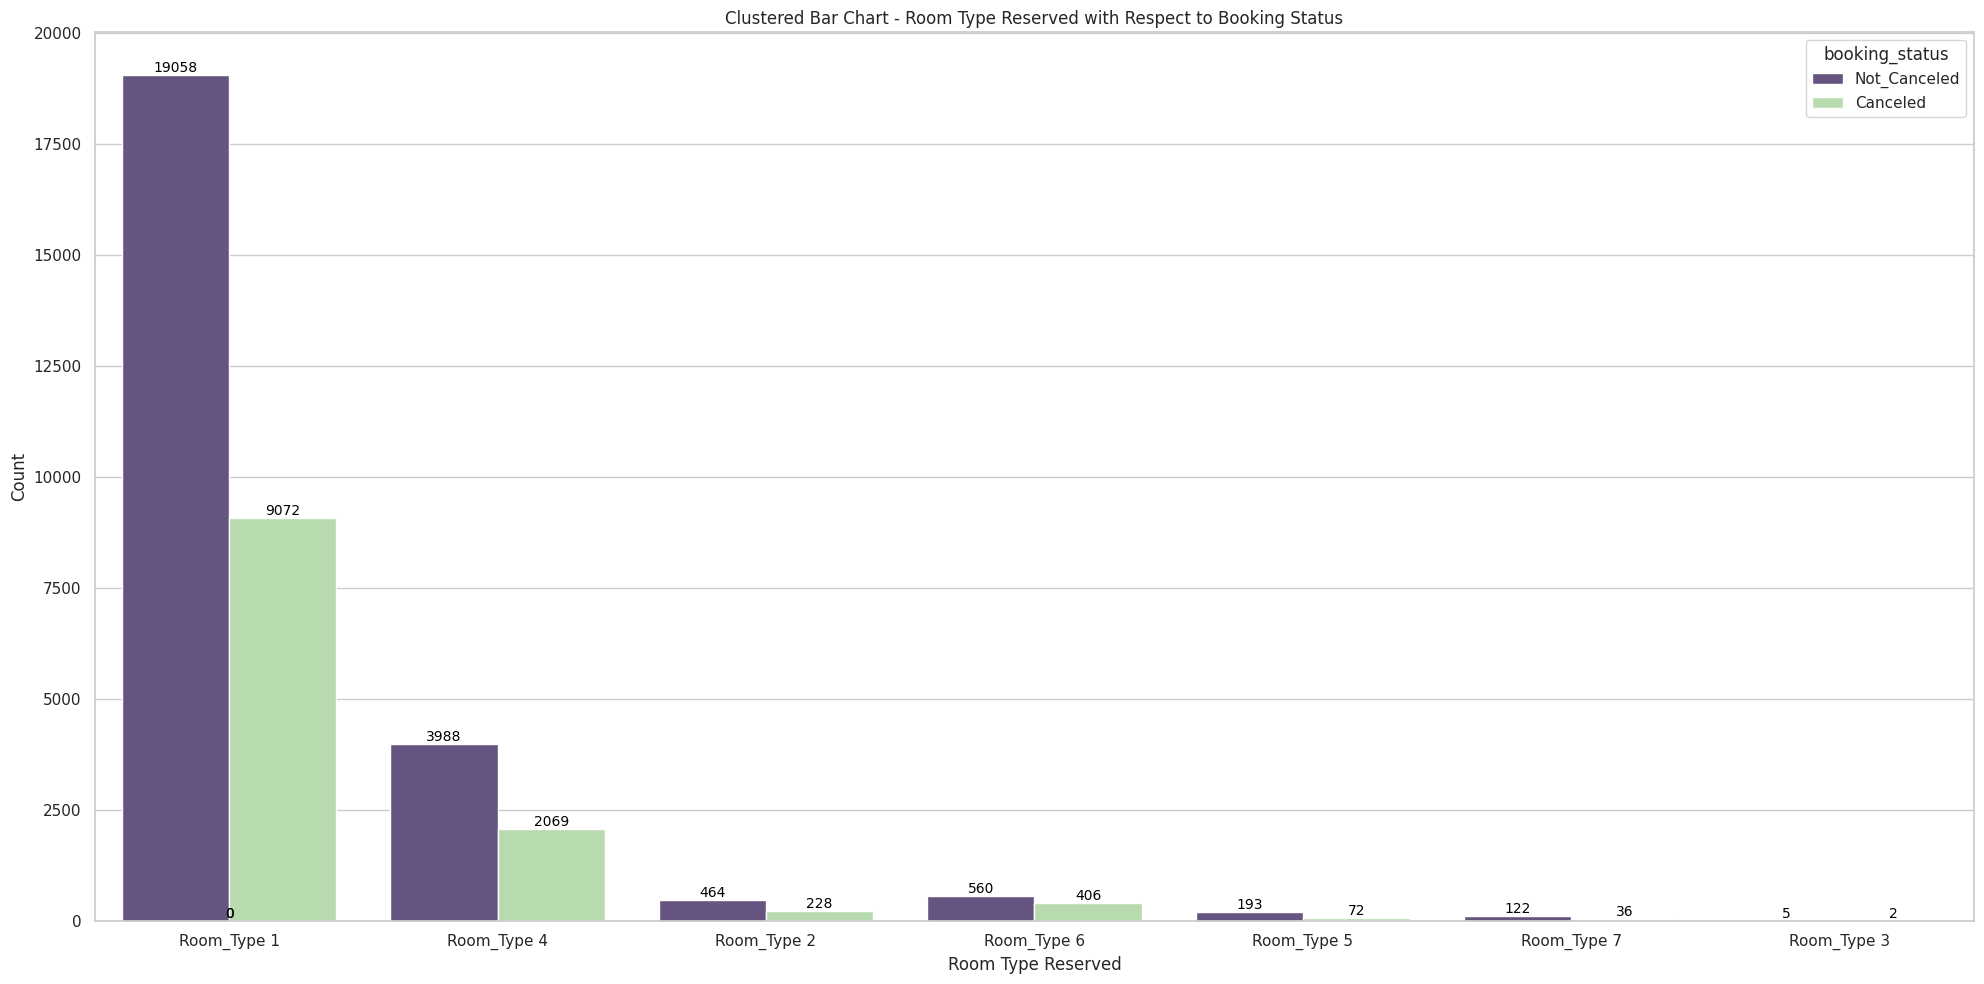

In [49]:
# calling a defined function to plot a bar chart in order to analyse room type reserved with respect to booking status
analyze_room_type_reserved(hotel_reservations_data, 'booking_status')

The above clustered bar chart indicates the following things :

1. Room Type 1 has higher bookings than all other room types with  non-canceled count of 19058 and a canceled count of 9072. This shows a strong preference among guests for this room type.

2. Room Type 1 and Room Type 4, the two most frequently reserved room types also have the highest cancellation counts. Room Type 1 shows a notable number of cancellations which indicates that popular room types may be more prone to cancellations.

3. Room Types 2, 3, 5, 6 and 7 have very low booking counts both canceled and non-canceled with Room Types 7 and 5 having almost negligible bookings. This could indicate that these room types are less desirable to guests.



## Correlation Heatmap

In [50]:
# Defining a function for data analysis
def plot_lower_half_heatmap(data):
    """
    This function creates heatmap for the correlation analysis

    Parameters:
    data : dataframe containing the data.
    """
    # Calculating correlation matrix
    corr = data.corr()

    # Creating mask for the upper triangle
    mask = np.triu(np.ones_like(corr, dtype=bool))
    sns.set(style="whitegrid")

    # Creating heatmap with full window width
    plt.figure(figsize=(13, 13))
    sns.heatmap(corr, mask=mask, annot=True, fmt=".2f", cmap="PRGn", cbar=True, square=True, linewidths=.5)
    plt.title('Correlation Heatmap - Lower Half')
    plt.tight_layout()
    plt.show()

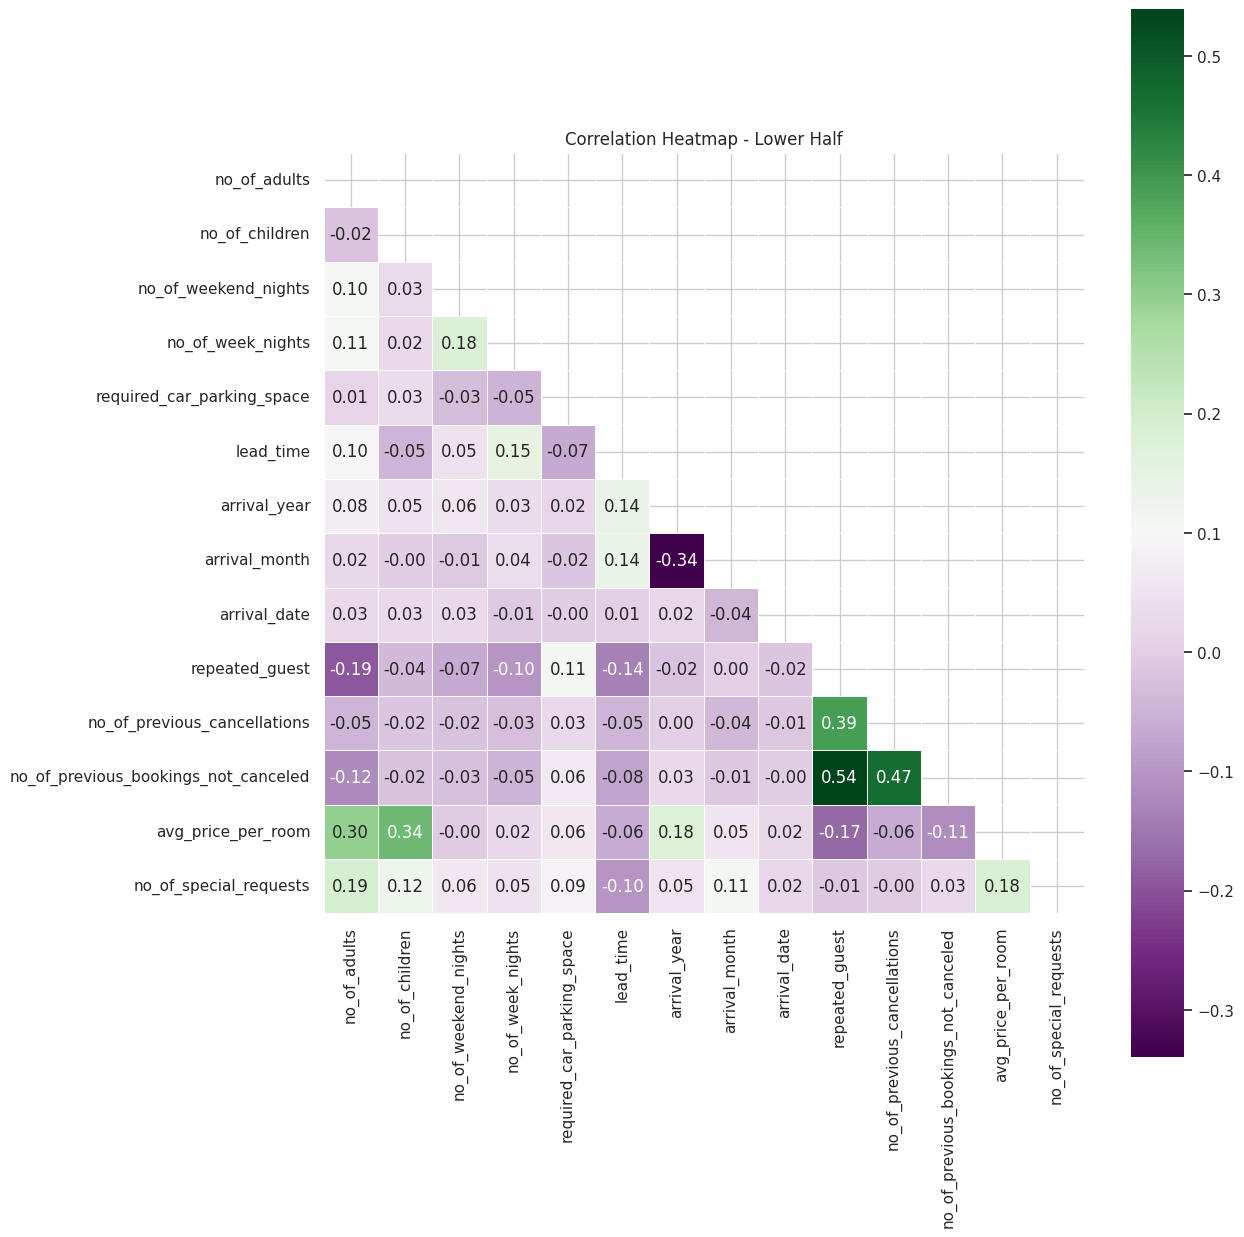

In [51]:
# calling a defined function to plot a heatmap in order to analyse correlation between different numerical columns
plot_lower_half_heatmap(hotel_reservations_data.select_dtypes(include='number'))

**Above correlation heatmap indicates following things :**

* Majority of the values in the heatmap are close to zero which suggests that many of these numerical variables do not have strong linear correlations with each other.
* Strongest positive relationship is between no_of_previous_bookings_not_canceled and no_of_previous_cancellations i.e. 0.54 represents that guests with a record of non-canceled bookings also tend to have a history of cancellations.
* Avg_price_per_room shows some associations with both no_of_adults and no_of_children which indicates that more guests may be linked to higher room prices.


# Conclusion

* The "Hotel Reservations Dataset" downloaded from the kaggle website was analysed containing total 36275 rows and 19 distinct columns. The booking_status column indicated whether the booking was canceled or not. No null and duplicate values were present in entire dataset. Outliers were examined but those were not handled becaues those may be valid for this type of the data.

* Multiple graphs including univariate, bivariate and multivariate graphs were plotted using python functions. It includes annotated and well labled line, vertical clustered bar chart and a correlation heatmap. All these plots made the analysis much more easier.

